# MLP 

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

In [3]:
class MLP(torch.nn.Module):
    
    def __init__(self, inputs, outputs, n_layers, hidden):
        super(MLP, self).__init__()
        self.n_layers = n_layers
        self.layers = torch.nn.ModuleList()
        for i in range(n_layers-1):
            if i==0:
                self.layers.append(torch.nn.Linear(inputs, hidden))
            else:
                self.layers.append(torch.nn.Linear(hidden, hidden))
        self.layers.append(torch.nn.Linear(hidden, outputs))
                
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.layers[i](x)
            x = torch.relu(x)
        x = self.layers[-1](x)
        x = torch.softmax(x, dim=1)
        return x

Utilizando da técnica de validação hold-out, onde dividimos o dataset em 20% para teste, 70% para treino e 20% para validação


In [4]:
dataframe = pd.read_csv('dados-ex5.txt', delimiter=",",
                        header=None, engine='python')

X = [x for x in zip(dataframe[0], dataframe[1])]
Y = dataframe[2]
X_train_full, X_test, y_train_full, y_test = model_selection.train_test_split(X, Y, train_size=0.8,test_size=0.2)

X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_train_full, y_train_full, train_size=0.8,test_size=0.2)


X_train_full = torch.tensor(X_train_full)
X_test = torch.tensor(X_test)
y_train_full = torch.tensor(y_train_full.values)
y_test = torch.tensor(y_test.values)

X_train = torch.tensor(X_train)
Y_train = torch.tensor(y_train.values)
X_validation = torch.tensor(X_validation)
Y_validation = torch.tensor(y_validation.values)

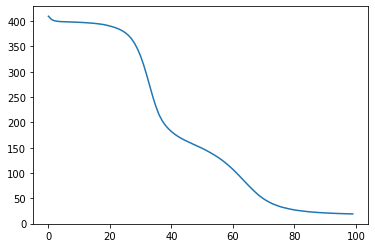

In [5]:
#train

model = MLP(2,2, 5, 8)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [6]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))


0.9861111111111112


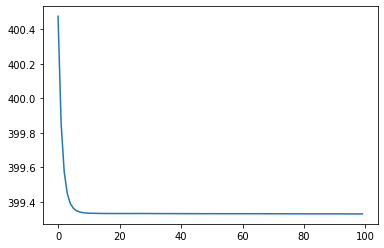

In [7]:
model = MLP(2,2, 10, 10)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [8]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))

0.4722222222222222


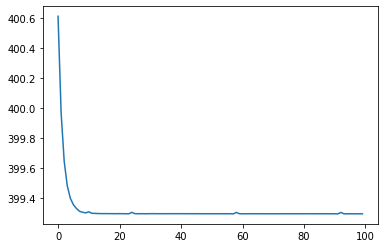

In [9]:
model = MLP(2,2, 15, 15)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [10]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))

0.4722222222222222


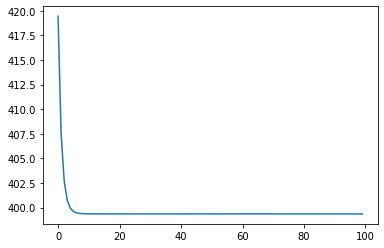

In [11]:
model = MLP(2,2, 15, 8)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [12]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))

0.4722222222222222


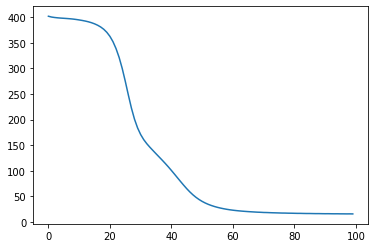

In [13]:
model = MLP(2,2, 5, 15)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [14]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))

0.9861111111111112


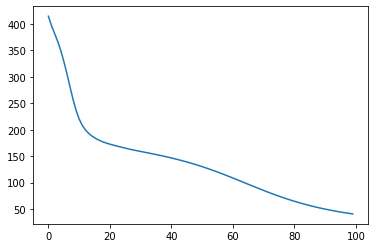

In [15]:
model = MLP(2,2, 3, 15)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, Y_train[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_validation)
val, idx = pred.max(dim=1)

In [16]:
hit = 0
for i in range(len(Y_validation)):
    if idx[i] == Y_validation[i].item():
        hit += 1
print(hit/len(Y_validation))

0.9861111111111112


Após alguns testes com diversas configurações de rede, com 5 camadas ocultas e 8 neuronios apresentou o melhor resultado. E com 10 camadas e 10 neuronios apresentou o pior resultado. 

Seguindo a estratégia da validação, juntamos a base de treino e a base de validação para treinar a rede, e usamos a base de teste para ter os resultados finais.

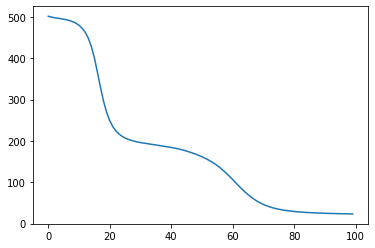

In [21]:
model = MLP(2,2, 5, 8)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train_full.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train_full[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, y_train_full[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_test)
val, idx = pred.max(dim=1)

In [22]:
hit = 0
for i in range(len(y_test)):
    if idx[i] == y_test[i].item():
        hit += 1
print(hit/len(y_test))

0.9833333333333333


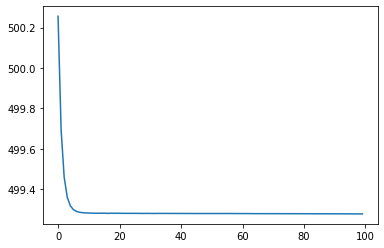

In [23]:
model = MLP(2,2, 10, 10)
model.train()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for n in range(X_train_full.shape[0]):
        optimizer.zero_grad()
        
        y_hat = model.forward(X_train_full[n].unsqueeze(0))
        y_target = torch.zeros(1, 2) 
        y_target[0, y_train_full[n].long()] = 1.0
        error = criterion(y_hat, y_target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

#test
model.eval()
with torch.no_grad():
    pred = model.forward(X_test)
val, idx = pred.max(dim=1)

In [24]:
hit = 0
for i in range(len(y_test)):
    if idx[i] == y_test[i].item():
        hit += 1
print(hit/len(y_test))

0.4888888888888889
